In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:
# hit_data_1096 = rf.get_ROOT_data_zip("TB_FIRE_1096_hits.root")

hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

# hit_data_1056 = rf.get_ROOT_data_zip("TB_FIRE_1056_hits.root")

# hit_data_1057 = rf.get_ROOT_data_zip("TB_FIRE_1057_hits.root")

# hit_data_1079 = rf.get_ROOT_data_zip("TB_FIRE_1079_hits.root")

TB_FIRE_1101_hits.root finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

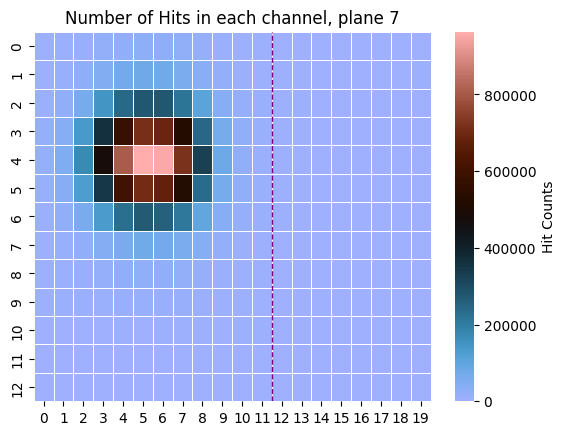

In [3]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 7)

In [4]:
# rf.hits_amount_colormap_single_plane(hit_data_1079, 0)

In [5]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 7, cmap="managua")

In [6]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 0, cmap="managua")

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [7]:
# rf.single_event_evolution_amp(hit_data_1101, 54106, cmap="managua")

In [8]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
# rf.amp_histo_single_plane(hit_data_1101,1)

In [9]:
# rf.amp_histo_single_plane_total_event(hit_data_1101,0)

In [10]:
# rf.amp_histo_single_plane_total_event(hit_data_1079,0)

In [11]:
# rf.average_amp_vs_plane(hit_data_1101)

In [12]:
# # shower initial starting points
# rf.plot_empty_first_planes(hit_data_1101)

<span style="font-family: arial; font-size:25px; color:pink">

Shower Characteeristics relation to initial location.

In [176]:
# Shower energy for different initial X positions of the shower
def energy_per_plane_vs_X_position(hit_data_1101):
    
    # get only showers starting at the first plane to identify the initial location
    plane_7 = hit_data_1101[hit_data_1101.plane == 7]
    mask = ak.num(plane_7) > 0
    first_plane_starting_events = hit_data_1101[mask]

    # determine the initial location of the shower
    # get the data on the first plane
    plane_7_clean = plane_7[mask]
    plane_7_channel = plane_7_clean.ch
    # divide by x positions
    y, x = divmod(plane_7_channel, 20) #y is the quontinent and is the row, x is the remainder and column
    x_list = x.to_list()
    x_ak = ak.Array(x_list)
    x_avg = ak.mean(x_ak, axis = 1)
    
    # compute the shower energy for each event
    hit_amp_array = hit_data_1101.amp
    event_shower_amp_array = ak.sum(hit_amp_array, axis = 1)

    # get the average shower energy for each X position
    unique, inverse = np.unique(x_avg, return_inverse=True)
    counts = np.bincount(inverse)
    sums = np.bincount(inverse, weights=event_shower_amp_array)

    x_reduced = unique
    avg_amp_per_position = sums/counts

    # plot the energy vs the initial X position of the shower
    plt.plot(x_reduced, avg_amp_per_position, marker='o')
    plt.set_xlabel('X Position at Shower Initiation [Pad Units]')
    plt.set_ylabel('AVG Shower Energy')
    plt.set_title('Average Shower Energy vs Initial Location')
    plt.grid(True)
    # plt.legend()

    

In [177]:
energy_per_plane_vs_X_position(hit_data_1101)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [145]:
amp = hit_data_1101.amp
amp.show()
print('#############')
samp = ak.sum(amp, axis = 1)
samp.show()

[[39, 27, 183, 73, 435, 83, 38, 63, ..., 27, 71, 558, 48, 156, 20, 161, 155],
 [13, 30, 81, 100, 471, 398, 29, 88, 41, ..., 227, 50, 29, 45, 108, 19, 54, 28],
 [17, 35, 26, 11, 406, 232, 82, 80, 17, ..., 55, 47, 70, 54, 80, 208, 18, 89],
 [87, 55, 530, 57, 116, 153, 32, 25, ..., 11, 12, 14, 67, 129, 350, 184, 130],
 [50, 265, 72, 136, 79, 107, 30, 379, ..., 33, 125, 133, 26, 33, 409, 96, 83],
 [21, 31, 24, 71, 21, 41, 27, 16, 76, ..., 53, 41, 145, 125, 324, 129, 13, 230],
 [52, 19, 148, 143, 42, 173, 75, 48, ..., 18, 17, 78, 86, 39, 51, 192, 168],
 [12, 228, 38, 85, 80, 39, 100, 109, 41, ..., 48, 73, 138, 113, 60, 43, 16, 23],
 [35, 54, 16, 93, 342, 89, 84, 51, 537, ..., 8, 8, 9, 9, 10, 11, 56, 289, 117],
 [17, 29, 70, 156, 42, 36, 188, 8, 8, ..., 69, 125, 441, 144, 188, 54, 25, 32],
 ...,
 [21, 449, 44, 248],
 [164, 40, 15, 14, 31, 50, 38, 18, 144, ..., 168, 134, 41, 40, 95, 37, 33, 16],
 [52, 175],
 [33, 31, 39, 48],
 [14, 142, 294, 143, 110, 45, 29, 43],
 [43, 151, 27, 151],
 [13, 4

In [98]:
# hit_data_1101.show()
print("#########")
plane_7 = hit_data_1101[hit_data_1101.plane == 7]
# plane_7.show()
print("#########")
plane_7clean = plane_7[ak.num(plane_7) > 0]
# plane_7clean.show()
print("#########")
mask = ak.num(plane_7) > 0
print(mask)
print("#########")
plane_7clean2 = plane_7[mask]
plane_7clean2.show()
print("#########")

# print(ak.all(plane_7clean == plane_7clean2))
print(ak.almost_equal(plane_7clean, plane_7clean2))

# Apply mask
# filtered = hit_data_1101[mask]

#########
#########
#########
[True, False, True, True, True, True, ..., False, False, False, False, False]
#########
[[{plane: 7, ch: 164, amp: 155}],
 [{plane: 7, ch: 186, amp: 89}],
 [{plane: 7, ch: 164, amp: 184}, {plane: 7, ch: 184, amp: 130}],
 [{plane: 7, ch: 163, amp: 83}],
 [{plane: 7, ch: 146, amp: 13}, {plane: 7, ch: 165, amp: 230}],
 [{plane: 7, ch: 145, amp: 168}],
 [{plane: 7, ch: 144, amp: 60}, {...}, ..., {plane: 7, ch: 167, amp: 23}],
 [{plane: 7, ch: 166, amp: 117}],
 [{plane: 7, ch: 145, amp: 32}],
 [{plane: 7, ch: 143, amp: 22}, {plane: 7, ch: 144, amp: 34}],
 ...,
 [{plane: 7, ch: 206, amp: 73}],
 [{plane: 7, ch: 187, amp: 27}],
 [{plane: 7, ch: 108, amp: 35}, {...}, {plane: 7, ch: 184, amp: 53}],
 [{plane: 7, ch: 145, amp: 34}],
 [{plane: 7, ch: 163, amp: 41}],
 [{plane: 7, ch: 145, amp: 43}],
 [{plane: 7, ch: 167, amp: 69}],
 [{plane: 7, ch: 165, amp: 78}, {plane: 7, ch: 166, amp: 109}],
 [{plane: 7, ch: 165, amp: 48}, {plane: 7, ch: 184, amp: 231}]]
#########
Tr

In [172]:
p7_ch = plane_7clean2.ch
y,x = divmod(p7_ch, 20)

print(y, "\n", x)
print("#######")
p7_ch.show()
print(type(p7_ch))
print("#######")
print(ak.mean(p7_ch, axis = 1))
print("#######")
x.show()
print("#######")
print(type(x))

x_list = x.to_list()
x2 = ak.Array(x_list)
print("#######")
print("#######")
print("#######")
print(ak.mean(x2, axis = 1))
                 

[[8], [9], [8, 9], [8], [7, 8], [7], ..., [7], [8], [7], [8], [8, 8], [8, 9]] 
 [[4], [6], [4, 4], [3], [6, 5], [5], ..., [5], [3], [5], [7], [5, 6], [5, 4]]
#######
[[164],
 [186],
 [164, 184],
 [163],
 [146, 165],
 [145],
 [144, 145, 165, 167],
 [166],
 [145],
 [143, 144],
 ...,
 [206],
 [187],
 [108, 166, 184],
 [145],
 [163],
 [145],
 [167],
 [165, 166],
 [165, 184]]
<class 'awkward.highlevel.Array'>
#######
[164, 186, 174, 163, 156, 145, 155, 166, ..., 153, 145, 163, 145, 167, 166, 174]
#######
[[4],
 [6],
 [4, 4],
 [3],
 [6, 5],
 [5],
 [4, 5, 5, 7],
 [6],
 [5],
 [3, 4],
 ...,
 [6],
 [7],
 [8, 6, 4],
 [5],
 [3],
 [5],
 [7],
 [5, 6],
 [5, 4]]
#######
<class 'awkward.highlevel.Array'>
#######
#######
#######
[4, 6, 4, 3, 5.5, 5, 5.25, 6, 5, 3.5, 7, ..., 7, 6, 7, 6, 5, 3, 5, 7, 5.5, 4.5]


In [178]:
x3 = ak.mean(x2, axis = 1)
unique, inverse = np.unique(x3, return_inverse=True)
inverse_int = np.rint(inverse).astype(np.int64)

counts = np.bincount(inverse_int)
sums = np.bincount(inverse, weights=samp)
print(sums/counts)
print(unique, "hi")
print(inverse)
print(counts)
print(sums)

AttributeError: no field named 'astype'

In [173]:
x   = ak.Array([3, 2, 3, 5, 1, 9])
amp = ak.Array([30, 10, 270, 5, 90, 11])


unique, inverse = np.unique(x, return_inverse=True)
counts = np.bincount(inverse)
sums = np.bincount(inverse, weights=amp)
print(sums/counts)
print(unique, "hi")
print(inverse)
print(counts)
print(sums)

[90, 10, 150, 5, 11]
[1, 2, 3, 5, 9] hi
[2, 1, 2, 3, 0, 4]
[1, 1, 2, 1, 1]
[90, 10, 300, 5, 11]


In [13]:
# average shower radius
def shower_radius_per_plane_single_event(hit_data, event):

    # find the initial location of the shower
    frst_plane_channels = hit_data[hit_data.plane == 0].ch
    

_IncompleteInputError: incomplete input (1306389801.py, line 5)